This notebook is used the Stack Overflow Annual Developer Survey in 2020 (https://insights.stackoverflow.com/survey)
The purpose of this notebook is to define and anwser 3 real world questions that are different than the example blog post from Josh Bernhard (https://medium.com/@josh_2774/how-do-you-become-a-developer-5ef1c1c68711), which used 2017 data. Josh questions as below
      How to break into the field ?
      How do the different method related to salary and job satisfaction ?
      What biases did the respondents have in suggesting different methods ?
My plan for this notebook is to answer the below questions about United State Developers:
       What company type offer the highest pay ?
       what is the relationship of working remotely and salary ?
       Does big companies offer higher salary for the same job ?
       What are the top 3 skills for hardward and software engineers ?

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv('./survey_results_public.csv')
pd.set_option("max_columns", None)
#pd.set_option("max_colwidth", None)
df.head(5)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [23]:
# get usa data frame
dfUSA = df.loc[df['Country']=="United States",  ['Salary', 'HomeRemote','CompanyType','YearsProgram', 'FormalEducation','EmploymentStatus']]
dfUSA = dfUSA.dropna()
dfUSA.head()

,Salary,HomeRemote,CompanyType,YearsProgram,FormalEducation,EmploymentStatus
17,130000.0,All or almost all the time (I'm full-time remote),Publicly-traded corporation,20 or more years,Bachelor's degree,Employed full-time
18,82500.0,A few days each month,Publicly-traded corporation,2 to 3 years,Bachelor's degree,Employed full-time
25,175000.0,"Less than half the time, but at least one day ...",Publicly-traded corporation,20 or more years,Master's degree,Employed full-time
70,65000.0,A few days each month,"Privately-held limited company, not in startup...",2 to 3 years,Some college/university study without earning ...,Employed full-time
72,120000.0,All or almost all the time (I'm full-time remote),Venture-funded startup,20 or more years,Some college/university study without earning ...,Employed full-time


# What company type offer the highest pay?

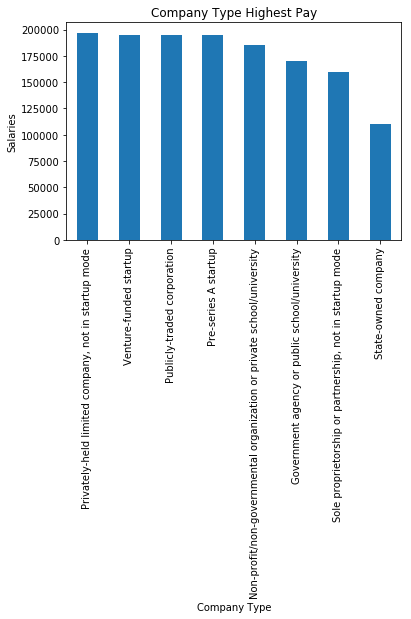

In [24]:
# clean up
serExclude = ["I don't know","I prefer not to answer","Something else"]
dfHighSal = dfUSA[~dfUSA['CompanyType'].isin(serExclude)]
dfHighSal = dfHighSal.groupby("CompanyType")['Salary'].max().sort_values(ascending=False)
dfHighSal.plot(kind='bar',x='CompanyType',y='Salary')

plt.ylabel('Salaries')
plt.xlabel('Company Type')
plt.title('Company Type Highest Pay')
plt.show()

# what is the relationship of working remotely and salary?

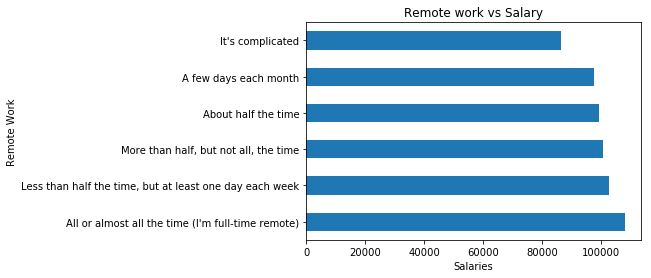

In [28]:
dfRemote = dfUSA.loc[dfUSA['HomeRemote'] != "Never",['HomeRemote','Salary']]
dfRemote = dfRemote.groupby("HomeRemote")['Salary'].mean().sort_values(ascending=False)
#dfRemote.head(100)
dfRemote.plot(kind='barh',x='HomeRemote',y='Salary')

plt.xlabel('Salaries')
plt.ylabel('Remote Work')
plt.title('Remote work vs Salary')
plt.show()



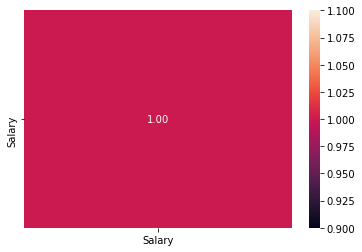

In [30]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");